In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator

#### Read Data


In [2]:
data = pd.read_csv('crime_data.csv')
df = pd.DataFrame(data)

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.rename(columns = {'Unnamed: 0':'States'},  inplace = True)
df.head() 

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.shape

(50, 5)

In [6]:
df.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

No Null Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


We have 1 categorical data,2 numerical and 3 float column in the dataset

In [8]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


#### Data Visualization

In [9]:
columns = list(df.select_dtypes(include=['int64','float64']).columns)
columns

['Murder', 'Assault', 'UrbanPop', 'Rape']

##### Histogram

In [10]:
def bar_plot(col_name):
    plt.figure(figsize=(10,5))
    plt.hist(x=df[col_name])
    plt.xlabel(col_name)

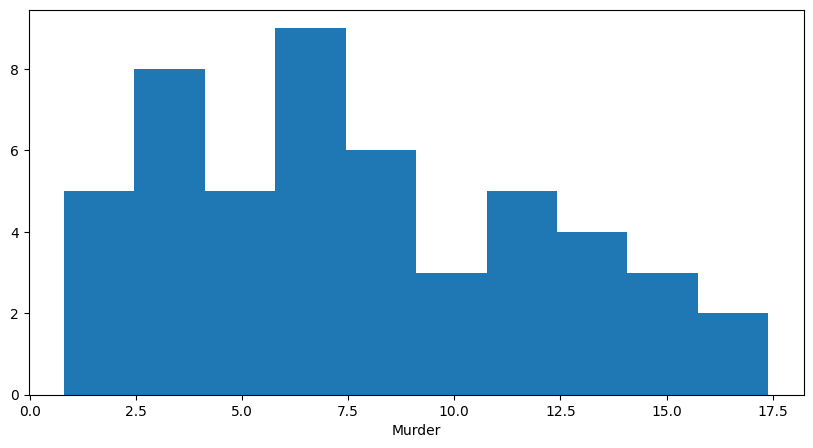

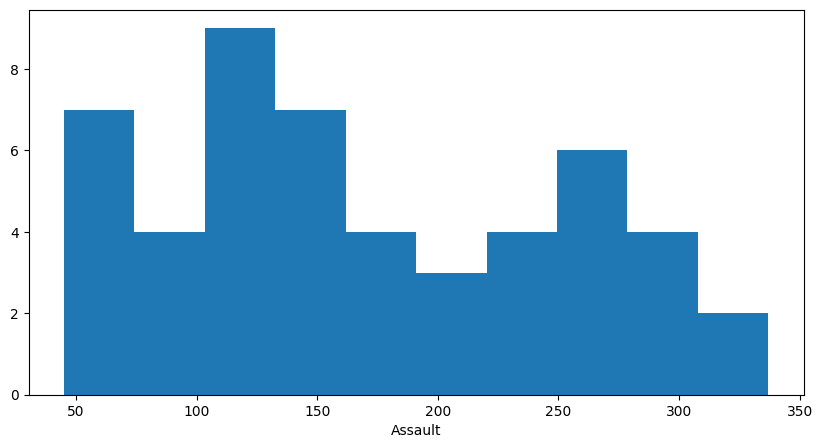

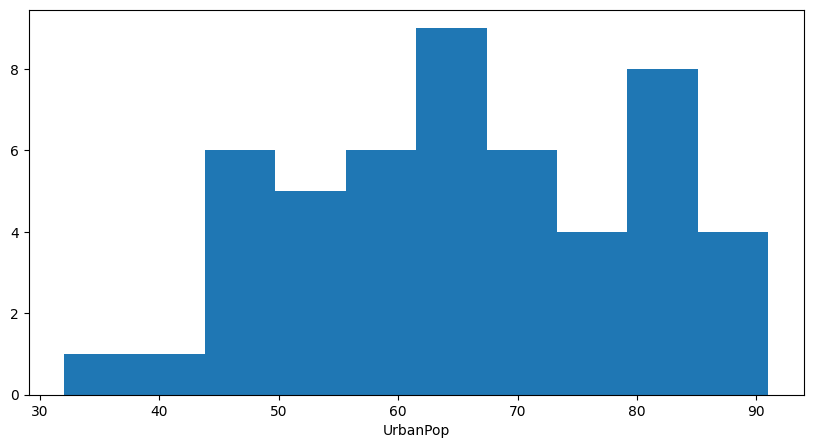

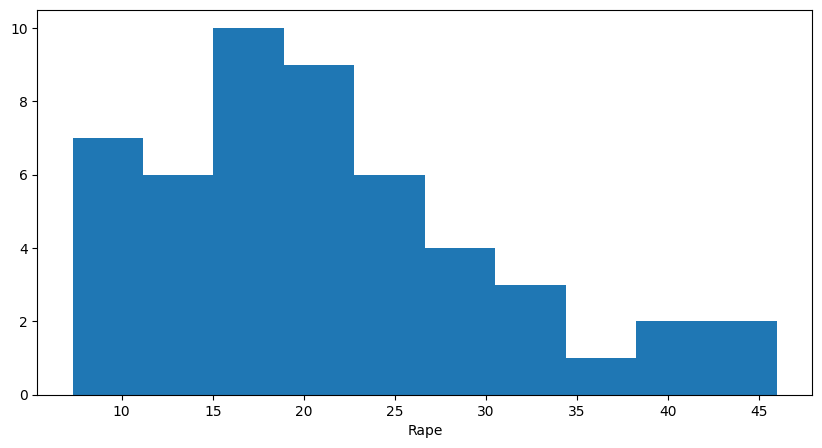

In [11]:
for col_name in columns:
    bar_plot(col_name)

##### Correlation matrix

<Axes: >

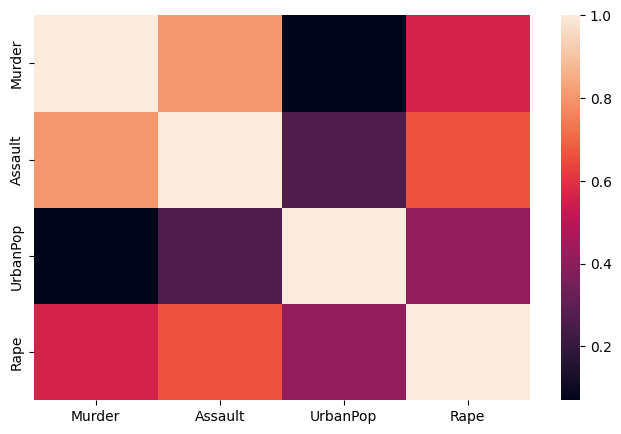

In [12]:
corr_matrix = df.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix)

Assualt,Rape,Murder are correlated with each other.

##### Barplot

In [13]:
def barplot(col_name):
    plt.figure(figsize=(10,5))
    sns.barplot(x=df.States,y=df[col_name])
    plt.xlabel('states')
    plt.ylabel(col_name)
    plt.xticks(rotation = 90)
    plt.show()

In [14]:
col = list(df.select_dtypes(include=['int64','float64']).columns)
col

['Murder', 'Assault', 'UrbanPop', 'Rape']

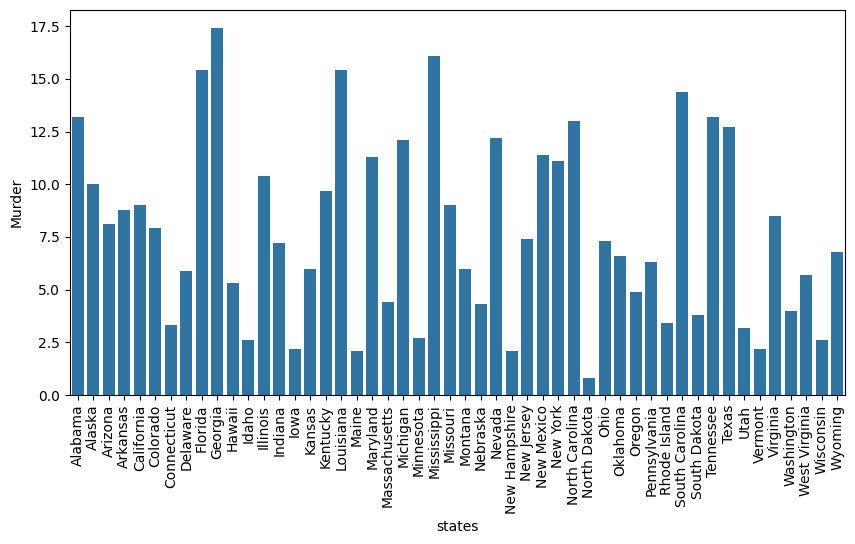

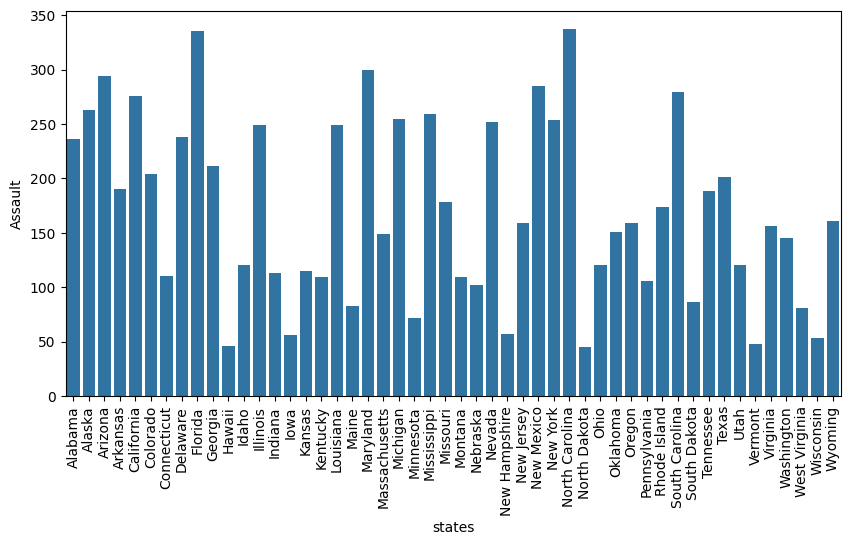

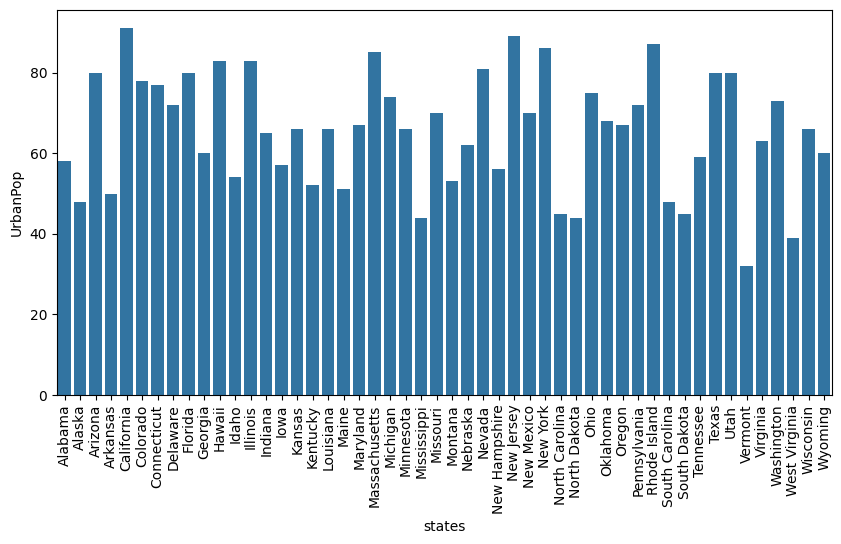

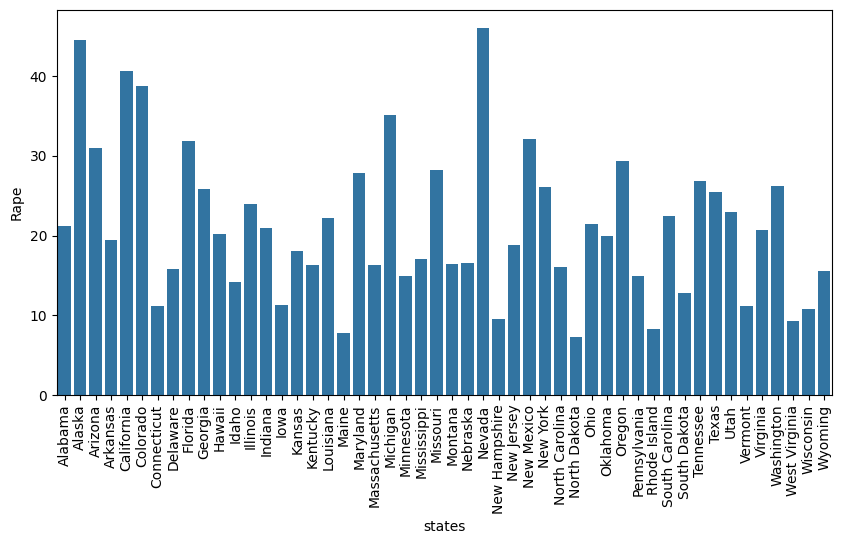

In [15]:
for col_name in col:
    barplot(col_name)

### Data Preprocessing

Standardisation of data

In [16]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df.iloc[:,1:])
df_std

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## K-Means Clustering

In [17]:
k_range = list(range(1,11))
wcss = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df_std)
    wcss.append(km.inertia_)

wcss

[200.00000000000003,
 104.96163315756871,
 83.25845759512646,
 58.12889839018574,
 53.681943200190055,
 48.12471094891631,
 40.58889979434831,
 39.040019897479176,
 35.95412730140404,
 32.480732588574256]

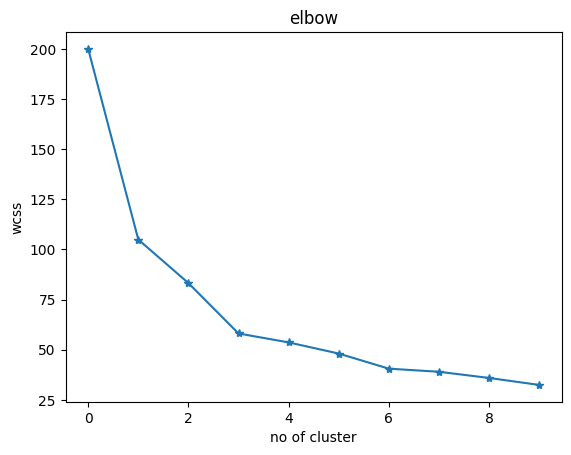

In [18]:
plt.plot(wcss,marker="*")
plt.title('elbow')
plt.xlabel('no of cluster')
plt.ylabel('wcss')
plt.show()

According to the elbow method, we can choose our number of clusters to be 4 as the decrease in wcss from cluster 3 is minimal.

The number of clusters to be taken = 4

Also we can use kneelocater which is used to select optimal value to k

In [19]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction ='decreasing')
kl.elbow

4

In [20]:
km = KMeans(n_clusters=4)
km.fit(df_std)

KMeans(n_clusters=4)

In [21]:
km.inertia_

58.20732074594072

The lesser the model inertia, the better the model fit.

In [22]:
km.labels_

array([3, 3, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [23]:
df['ClusterId_kmeans'] = km.labels_ 
df.head()

,States,Murder,Assault,UrbanPop,Rape,ClusterId_kmeans
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
